#**K-Means Algorithm Description:**

The k-means algorithm is an iterative, unsupervised machine learning algorithm used for clustering data into k distinct groups or clusters. The main steps of the algorithm include:

1. **Initialization:**
   - Randomly select k data points as initial cluster centroids.

2. **Assignment:**
   - Assign each data point to the nearest centroid, forming k clusters.

3. **Update:**
   - Recalculate the centroids of each cluster based on the mean of the data points assigned to that cluster.

4. **Repeat:**
   - Repeat the assignment and update steps until convergence (when centroids do not change significantly) or after a specified number of iterations.

5. **Output:**
   - The final output is k clusters with their respective centroids.

The choice of the number of clusters (k) is crucial, and techniques such as the elbow method (analyzing the change in variance explained with increasing k) can help determine an optimal value. The algorithm aims to minimize the intra-cluster variance and maximize the inter-cluster variance. The result is a partitioning of the dataset into distinct groups, making it a popular technique for exploratory data analysis and pattern recognition.

##Dataset Description:

The code operates on the Iris dataset, which is a well-known dataset in machine learning and statistics. The Iris dataset consists of measurements of sepal length, sepal width, petal length, and petal width for 150 iris flowers, with 50 flowers from each of three different species (setosa, versicolor, and virginica). Each species is represented by a different integer label.

##Code Description:

1. **Data Loading and Visualization:**
   - The code starts by importing necessary libraries such as Matplotlib, NumPy, Pandas, Seaborn, and the Iris dataset from scikit-learn.
   - It loads the Iris dataset and extracts the features (X) and labels (y).
   - Optionally, it creates a Pandas DataFrame (`iris_df`) for better visualization, including feature names and target labels.

2. **Visualization of Initial Data:**
   - A scatter plot is created to visualize the relationship between the first two features of the Iris dataset (sepal length vs. sepal width). Different colors represent different iris species.

3. **K-Means Clustering Algorithm Implementation:**
   - A custom implementation of the k-means clustering algorithm is provided in a class named `k_means_clustering`. The class is initialized with parameters such as the number of clusters (k), maximum iterations, and convergence threshold (epsilon).

   - The k-means algorithm is implemented with methods for initializing centroids, calculating distances, updating centroids, and clustering data points.

   - The algorithm iteratively updates centroids until convergence or reaching the maximum number of iterations.

4. **K-Means Clustering for Different Values of k:**
   - A loop is used to perform k-means clustering for different values of k. For each k, the algorithm is applied to the Iris dataset, and the Mean Squared Error (MSE) is calculated based on the final centroids.

   - The MSE values for different k values are then plotted to help identify an optimal number of clusters.

5. **Visualization of Clustering Results:**
   - The code visualizes the clustering results for the chosen k value (k=3) by plotting clustered data points and final centroids. Different colors represent different clusters.

6. **MSE Plot Over Iterations:**
   - The code also generates a plot showing how the Mean Squared Error (MSE) changes over the iterations of the k-means algorithm. This can provide insights into the convergence of the algorithm.



In [19]:
# Importing necessary libraries for data visualization and analysis
import matplotlib.pyplot as plt  # Matplotlib for plotting
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import seaborn as sns  # Seaborn for statistical data visualization
from sklearn.datasets import load_iris  # Scikit-learn for machine learning and datasets

In [20]:
# Set theme
sns.set_theme()

In [21]:
# Load the Iris dataset from scikit-learn
iris = load_iris()

# Extract features (X) and target variable (y) from the dataset
X = iris.data  # Features
y = iris.target  # Target variable

In [22]:
# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

Data Visualization

In [23]:
# Explore the data
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [24]:
# Display information about the DataFrame
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None


In [25]:
# Display descriptive statistics of the DataFrame
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
# Visualize the relationships between pairs of features with a pair plot
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.show()

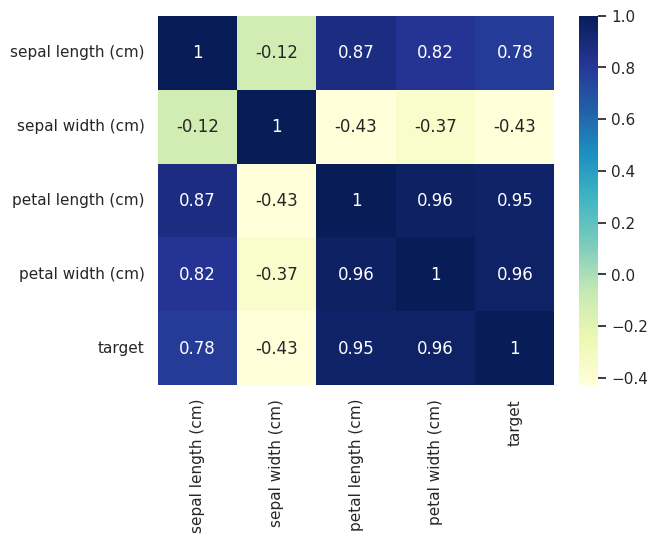

In [26]:
# Generate correlation matrix
corr_matrix = iris_df.corr()
# Plot correlation heatmap
sns.set_style('white')
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

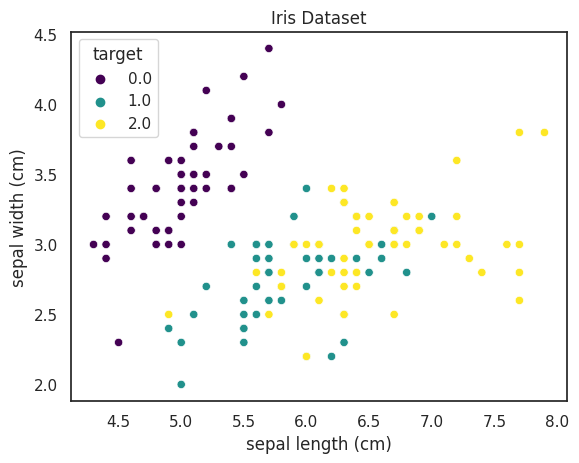

In [27]:
# Plot the data using Seaborn
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['target'], palette='viridis', legend='full')

# Set plot title and axis labels
plt.title("Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Display the plot
plt.show()

Model Building

In [28]:
class k_means_clustering():
    def __init__(self, k=3, max_iter=100, epsilon=0.01) -> None:
        """
        Constructor to initialize parameters.

        Parameters:
        - k: Number of clusters (default: 3)
        - max_iter: Maximum number of iterations (default: 100)
        - epsilon: Convergence threshold (default: 0.01)
        """
        self.X = None
        self.k = k
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.centroid_history = None
        self.final_centroids = None

    def fit(self, X):
        """
        Main method to fit the k-means algorithm to the data.

        Parameters:
        - X: Input data array
        """
        self.X = X
        C_old = self.initialize_centroids()
        C_new = self.new_centroids(C_old)
        self.centroid_history = [C_old, C_new]
        centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]

        iter = 0
        while max(centroid_distances) > self.epsilon and iter < self.max_iter:
            C_old, C_new = C_new, self.new_centroids(C_new)
            self.centroid_history.append(C_new)
            centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]
            iter += 1
        self.final_centroids = C_new

    def initialize_centroids(self):
        """
        Initialize centroids randomly from the data.

        Returns:
        - centroids: List of initial centroid coordinates
        """
        centroids = []
        for _ in range(self.k):
            i = np.random.randint(len(self.X))
            centroids.append(self.X[i, :])
        return centroids

    def new_centroids(self, centroids):
        """
        Update centroids based on the current clustering.

        Parameters:
        - centroids: List of current centroid coordinates

        Returns:
        - new_centroids: List of updated centroid coordinates
        """
        new_centroids = []
        A = self.make_classes(centroids)
        for i in range(len(centroids)):
            if len(A[i]) > 0:
                new_centroids.append(1 / len(A[i]) * sum(A[i]))
        return new_centroids

    def distance(self, a, b):
        """
        Euclidean distance between two points.

        Parameters:
        - a: First point
        - b: Second point

        Returns:
        - Distance between a and b
        """
        return np.sqrt((a - b) @ (a - b))

    def clustering(self, x, centroids):
        """
        Assign data point to the nearest centroid.

        Parameters:
        - x: Data point
        - centroids: List of centroid coordinates

        Returns:
        - Index of the nearest centroid
        """
        distances = np.array([self.distance(x, centroid) for centroid in centroids])
        return np.argmin(distances)

    def make_classes(self, centroids):
        """
        Assign all data points to their respective clusters.

        Parameters:
        - centroids: List of centroid coordinates

        Returns:
        - A: Dictionary mapping cluster index to a list of data points in that cluster
        """
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in self.X:
            A[self.clustering(x, centroids)].append(x)
        return A

    def predict_classes(self, data, centroids):
        """
        Assign classes to new data points.

        Parameters:
        - data: New data points
        - centroids: List of centroid coordinates

        Returns:
        - A: Dictionary mapping cluster index to a list of data points in that cluster
        """
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in data:
            A[self.clustering(x, centroids)].append(x)
        return A

    def mse_classes(self, centroids):
        """
        Compute Mean Squared Error for each cluster.

        Parameters:
        - centroids: List of centroid coordinates

        Returns:
        - Total Mean Squared Error across all clusters
        """
        errors = []
        A_classes = self.make_classes(centroids)
        for i, centroid in enumerate(centroids):
            error = sum(.5 * (centroid - a) @ (centroid - a) for a in A_classes[i])
            errors.append(error)
        return sum(errors)

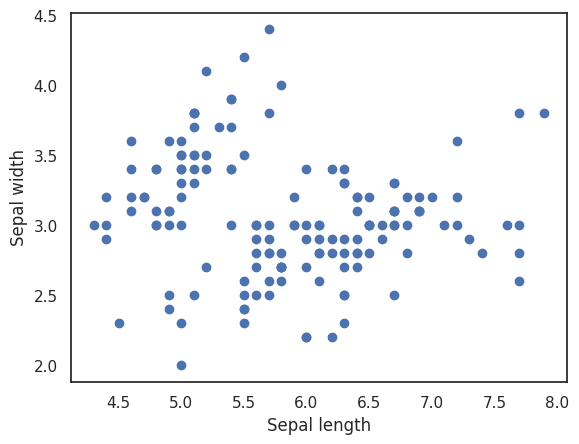

In [29]:
X_first_2= X[:,:2]

# plot the data
plt.scatter(X_first_2[:,0],X_first_2[:,1])
plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.show()

In [30]:
# Create an instance of the k_means_clustering class with specified parameters
k_means = k_means_clustering(k=2, max_iter=100, epsilon=0.01)

# Fit the k-means algorithm to the data
k_means.fit(X)

In [39]:
# Extract the final cluster centroids from the k_means instance
centroids = k_means.final_centroids


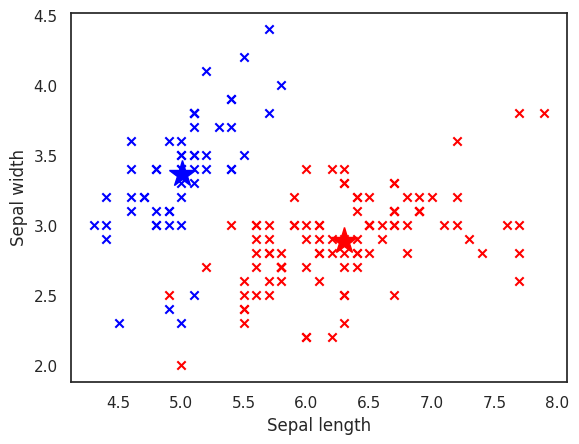

In [32]:
# Predict cluster labels for each data point using the final centroids
clusters = k_means.predict_classes(X, k_means.final_centroids)

# Plot the clustered data points and centroids
for label, _ in clusters.items():
    for x in clusters[label]:
        # Scatter plot for each cluster with different colors
        if label == 0:
            plt.scatter(x[0], x[1], color="blue", marker='x')
        else:
            plt.scatter(x[0], x[1], color="red", marker='x')

# Plot the final centroids with a larger marker size
plt.plot(centroids[0][0], centroids[0][1], color="blue", marker='*', markersize=20, label='Centroid 1')
plt.plot(centroids[1][0], centroids[1][1], color="red", marker='*', markersize=20, label='Centroid 2')

# Set axis labels and display the legend
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

# Display the plot
plt.show()

Model Evaluation

In [33]:
# Compute Mean Squared Error (MSE) for each cluster
mse = k_means.mse_classes(centroids)

# Print the calculated MSE
print(f"The MSE of points around two centroids is: {round(mse, 3)}.")

The MSE of points around two centroids is: 76.174.


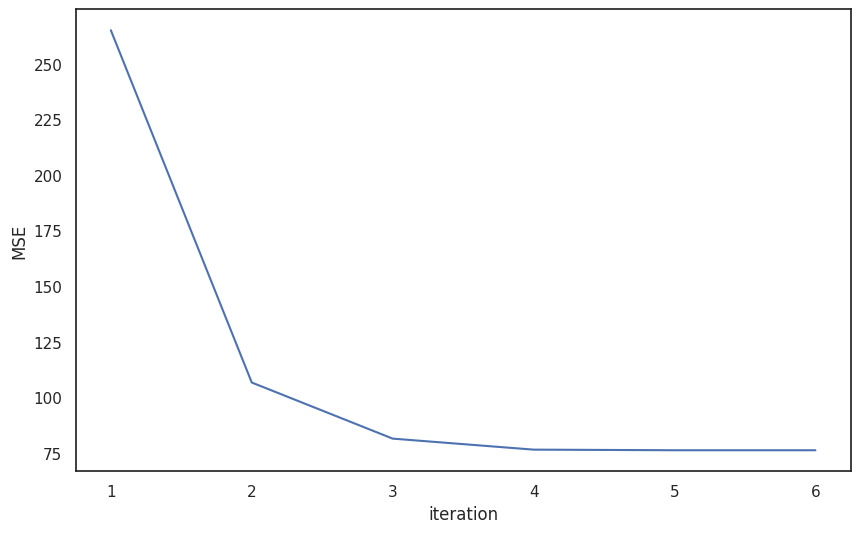

In [34]:
# Calculate Mean Squared Error (MSE) for each centroid history
errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]

# Plot the MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, len(errors) + 1)], errors)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Over Iterations in K-Means Clustering')
plt.show()

In [35]:
# Create an instance of the k_means_clustering class with updated parameters
k_means = k_means_clustering(k=3, max_iter=100, epsilon=0.01)

# Fit the k-means algorithm to the data
k_means.fit(X)

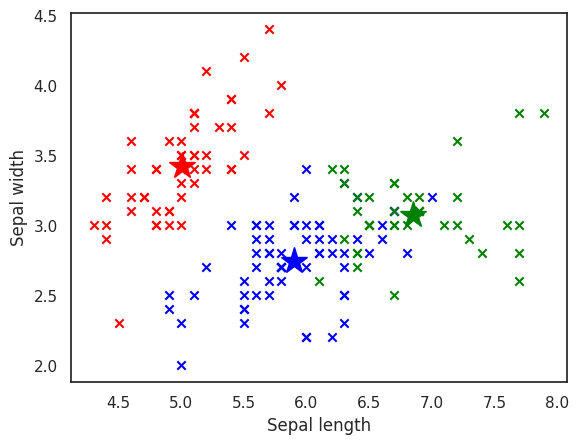

In [36]:
# Extract the final cluster centroids from the k_means instance
centroids = k_means.final_centroids

# Predict cluster labels for each data point using the final centroids
clusters = k_means.predict_classes(X, k_means.final_centroids)

# Plot the clustered data points and centroids for three clusters
for label, _ in clusters.items():
    for x in clusters[label]:
        # Scatter plot for each cluster with different colors
        if label == 0:
            plt.scatter(x[0], x[1], color="blue", marker='x')
        elif label == 1:
            plt.scatter(x[0], x[1], color="red", marker='x')
        else:
            plt.scatter(x[0], x[1], color="green", marker='x')

# Plot the final centroids with a larger marker size
plt.plot(centroids[0][0], centroids[0][1], color="blue", marker='*', markersize=20, label='Centroid 1')
plt.plot(centroids[1][0], centroids[1][1], color="red", marker='*', markersize=20, label='Centroid 2')
plt.plot(centroids[2][0], centroids[2][1], color="green", marker='*', markersize=20, label='Centroid 3')

# Set axis labels and display the legend
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

# Display the plot
plt.show()

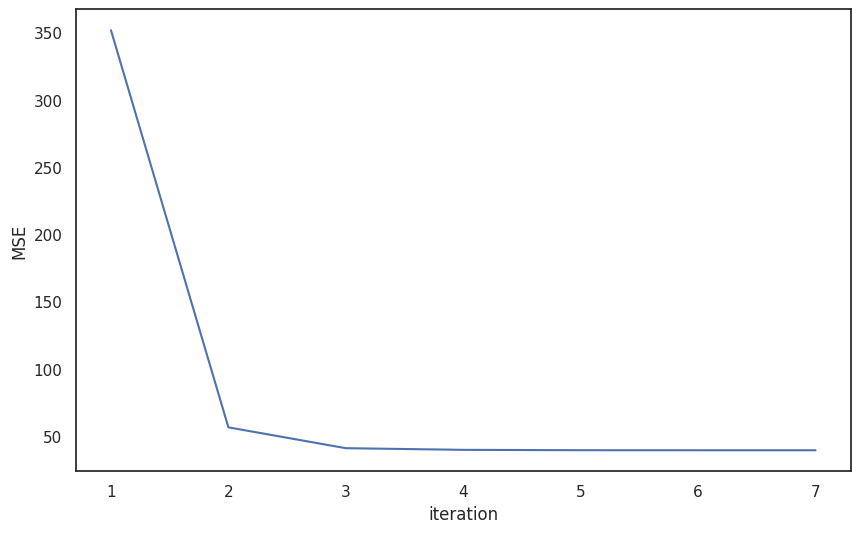

The final MSE of points around two centroids is: 39.426.


In [37]:
# Calculate Mean Squared Error (MSE) for each centroid history
errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]

# Plot the MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, len(errors) + 1)], errors)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Over Iterations in K-Means Clustering')
plt.show()

# Calculate the final Mean Squared Error (MSE) using the final centroids
mse = k_means.mse_classes(centroids)

# Print the final calculated MSE
print(f"The final MSE of points around three centroids is: {round(mse, 3)}.")

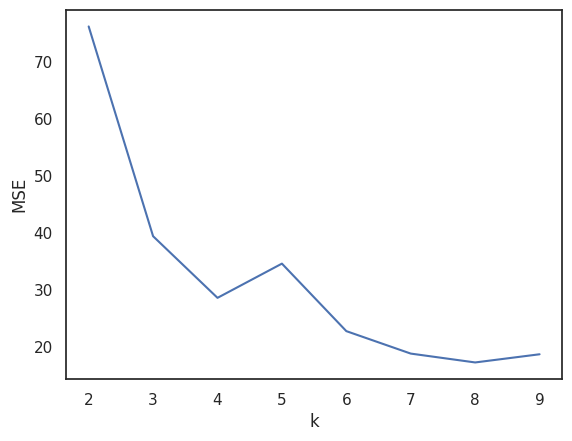

In [38]:
# Initialize an empty list to store Mean Squared Error (MSE) values for different k values
mse_list = []

# Iterate over different values of k
for k in range(2, 10):
    # Create an instance of the k_means_clustering class with the current k value
    k_means = k_means_clustering(k=k, max_iter=100, epsilon=0.01)

    # Fit the k-means algorithm to the data
    k_means.fit(X)

    # Extract the final cluster centroids
    centroids = k_means.final_centroids

    # Calculate the Mean Squared Error (MSE) for the current k value
    mse = k_means.mse_classes(centroids)

    # Append the calculated MSE to the list
    mse_list.append(mse)

# Plot the MSE values for different values of k
plt.plot([i for i in range(2, len(mse_list) + 2)], mse_list)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE for Different Values of k in K-Means Clustering')
plt.show()

#Conclusion

In summary, the code employs the k-means clustering algorithm to partition the Iris dataset into distinct groups based on sepal length and sepal width. The exploration includes visualizing the initial data distribution, implementing a flexible k-means algorithm, and assessing clustering performance for various cluster numbers. The Mean Squared Error (MSE) is utilized to evaluate the quality of clustering, and the code provides a comprehensive view of how the algorithm behaves for different values of k. This example demonstrates the versatility of k-means in uncovering patterns within a dataset and its role in unsupervised learning.